In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
from scipy import stats
%matplotlib inline

from sklearn.metrics import classification_report, confusion_matrix

In [2]:
df = pd.read_csv("data/df_eda2.csv")

In [3]:
df.head()

,country,state,goal_usd_log,name_len,category,delta_dead_laun
0,US,successful,6.907755,23,"""slug"":""games/playing cards""",720.0
1,US,successful,9.615805,51,"""slug"":""music/rock""",720.0
2,GB,failed,9.479141,34,"""slug"":""games/playing cards""",1439.0
3,US,successful,7.937375,40,"""slug"":""publishing/nonfiction""",720.0
4,US,successful,8.160518,31,"""slug"":""music/classical music""",720.0


In [7]:
df['category'].head()

0      "slug":"games/playing cards"
1               "slug":"music/rock"
2      "slug":"games/playing cards"
3    "slug":"publishing/nonfiction"
4    "slug":"music/classical music"
Name: category, dtype: object

In [13]:
df['category'] = df['category'].str.strip('"slug')

In [14]:
df.head()

,country,state,goal_usd_log,name_len,category,delta_dead_laun
0,US,successful,6.907755,23,":""games/playing card",720.0
1,US,successful,9.615805,51,":""music/rock",720.0
2,GB,failed,9.479141,34,":""games/playing card",1439.0
3,US,successful,7.937375,40,":""publishing/nonfiction",720.0
4,US,successful,8.160518,31,":""music/classical music",720.0


In [79]:
df.describe()

,goal_usd_log,name_len,delta_dead_laun
count,187812.000000,187812.000000,187812.000000
mean,8.431109,35.220353,779.703230
std,1.547815,15.703031,276.715503
min,4.615121,1.000000,24.000000
25%,7.313220,22.000000,719.000000
50%,8.517193,35.000000,720.000000
75%,9.433484,49.000000,813.000000
max,13.815510,85.000000,2234.000000


<AxesSubplot:xlabel='delta_dead_laun', ylabel='Count'>

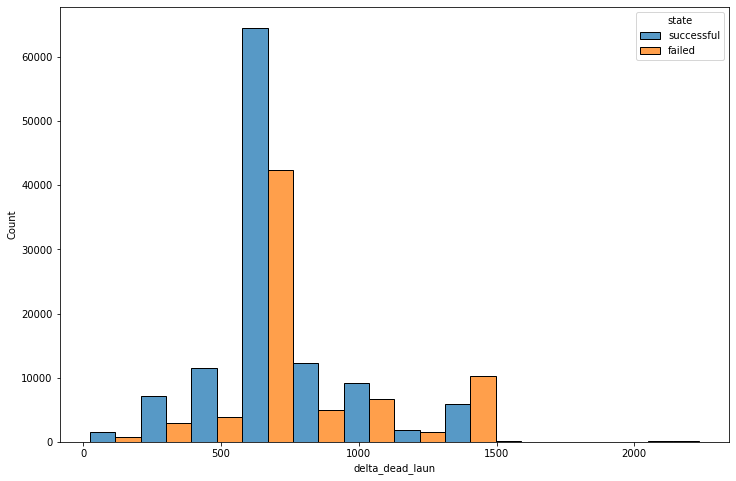

In [85]:
plt.figure(figsize=(12, 8))
sns.histplot(data=df, x='delta_dead_laun', bins=12, hue='state', multiple='dodge')

In [16]:
df['category'] = df['category'].str.strip(':"')

In [17]:
df.head()

,country,state,goal_usd_log,name_len,category,delta_dead_laun
0,US,successful,6.907755,23,games/playing card,720.0
1,US,successful,9.615805,51,music/rock,720.0
2,GB,failed,9.479141,34,games/playing card,1439.0
3,US,successful,7.937375,40,publishing/nonfiction,720.0
4,US,successful,8.160518,31,music/classical music,720.0


<AxesSubplot:xlabel='category', ylabel='Count'>

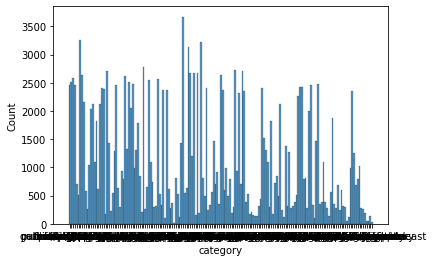

In [18]:
sns.histplot(data=df, x='category')

In [60]:
cat_top = df['category'].value_counts()

In [70]:
category_top = cat_top[0:10]

In [76]:
cats = []

for i in range(10):
    cats.append(category_top[i])

In [77]:
cats

[3670, 3262, 3214, 3127, 2775, 2724, 2716, 2707, 2678, 2677]

In [37]:
df2 = df.query('category == "design/product design" or category == "fashion/accessorie" or category == "comics/comic book" or category == "games/tabletop game" or category == "technology/gadget"')

In [43]:
df2

,country,state,goal_usd_log,name_len,category,delta_dead_laun
8,GB,successful,6.208971,50,fashion/accessorie,720.0
24,US,successful,6.214608,51,fashion/accessorie,720.0
76,US,successful,8.699515,18,fashion/accessorie,600.0
98,US,successful,6.309918,25,fashion/accessorie,360.0
100,US,successful,7.170120,51,fashion/accessorie,1080.0
...,...,...,...,...,...,...
187667,US,successful,6.684612,44,comics/comic book,720.0
187682,US,successful,8.411833,20,comics/comic book,744.0
187748,GB,successful,8.288293,17,comics/comic book,624.0
187750,GB,successful,7.978138,19,comics/comic book,755.0


In [50]:
df2.groupby('category').count()

,country,state,goal_usd_log,name_len,delta_dead_laun
category,,,,,
comics/comic book,3127,3127,3127,3127,3127
design/product design,3670,3670,3670,3670,3670
fashion/accessorie,3262,3262,3262,3262,3262
games/tabletop game,3214,3214,3214,3214,3214
technology/gadget,2775,2775,2775,2775,2775


<AxesSubplot:xlabel='category', ylabel='Count'>

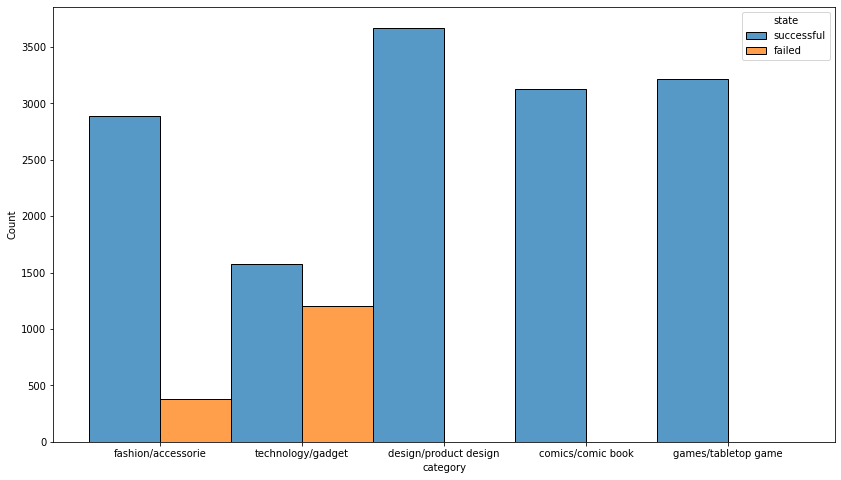

In [56]:
plt.figure(figsize=(14, 8))
sns.histplot(data=df2, x='category', hue='state', multiple="dodge")